In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import dgl
import os
import numpy as np
import pickle as pkl

In [2]:
os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [165]:
from transformers import BertTokenizer

tker = BertTokenizer.from_pretrained('bert-base-uncased')
tkset = list(tker.get_vocab().keys())[1000:]

'/chj/dev/lianxiaolei/weakly-text-classification'

In [188]:
from nltk.corpus import wordnet as wn
bank1 = wn.synsets('nba')  #得到与bank所有的同义词
print(bank1)

# bank2 =wn.synsets('bank.n.01')   #把 bank.n.01 作为一个单词，然后找它的同义词，当然没有啦
# print(bank2) # 结果是：[] 。

# bank3 = wn.synset('bank.n.01') # 这是找到 bank.n.01 这个词，所以可以输出
# print(bank3)

[]


In [60]:
# import torch
# a = torch.load('/chj/dev/lianxiaolei/LOTClass/datasets/agnews/category_vocab.pt')
# a

In [189]:
with open('dbpedia_n2v_cate_sims_v4.pkl', 'rb') as fin:
    dic = pkl.load(fin)
dic

{'company': [['corporation', 0.9601399302482605],
  ['inc', 0.954104483127594],
  ['ltd', 0.9501482844352722],
  ['owned', 0.9353868961334229],
  ['systems', 0.9297789335250854],
  ['software', 0.9296708703041077],
  ['subsidiary', 0.9295699000358582],
  ['global', 0.9139055609703064],
  ['products', 0.913793683052063],
  ['headquartered', 0.9124624133110046],
  ['markets', 0.9092072248458862],
  ['equipment', 0.9089046120643616],
  ['venture', 0.9078860878944397],
  ['industries', 0.907792329788208],
  ['companies', 0.9042961001396179],
  ['product', 0.896612823009491],
  ['operations', 0.8961936235427856],
  ['employees', 0.8959784507751465],
  ['corporate', 0.8928089737892151],
  ['manufacturing', 0.8924184441566467],
  ['network', 0.8916212916374207],
  ['services', 0.8899234533309937],
  ['market', 0.8881134986877441],
  ['support', 0.8859262466430664],
  ['manufacturer', 0.8836780190467834],
  ['netherlands', 0.8799975514411926],
  ['financial', 0.8799871206283569],
  ['operator'

In [147]:
# dic = {'government': ['democratic', 'xinhuanet', 'threat', 'fight', 'southeast', 'continent', 'britain', 'khartoum', 'string', 'violence', 'sudanese', 'foreign', 'united', 'warning', 'standoff', 'deadline', 'week', 'reuters', 'role', 'aug', 'secretary', 'allawi', 'worker', 'control', 'electricity', 'month', 'organization', 'movement', 'progress', 'delegation', 'help', 'lebanon', 'siege', 'presence', 'destruction', 'quot', 'muslim', 'situation', 'spokesman', 'conflict', 'baghdad', 'liberation', 'congo', 'interior', 'aid', 'truce', 'ministry', 'measure', 'african', 'permission', 'terrorism', 'chief', 'oil', 'dec', 'headquarters', 'election', 'resistance', 'concern', 'act', 'move', 'cease', 'statement', 'support', 'darfur', 'resolution', 'sign', 'army', 'leadership', 'nairobi', 'criticism', 'corruption', 'population', 'reform', 'abuja', 'province', 'iraqi', 'islamic', 'cabinet', 'republic', 'security', 'relief', 'affair', 'british', 'office', 'kuala', 'proposal'],
#        'sport': ['quarterback', 'career', 'club', 'football', 'basketball', 'coach', 'cbc', 'team', 'championship', 'trophy', 'injury', 'cup', 'stadium', 'ncaa', 'opener', 'oklahoma', 'minnesota', 'captain', 'kansa', 'bowl', 'title', 'night', 'ohio', 'player', 'series', 'uefa', 'receiver', 'viking', 'abc', 'baseball', 'soccer', 'match', 'draw', 'dolphin', 'yankee', 'agent', 'college', 'golf', 'nba', 'champion', 'olympic', 'greece', 'association', 'university', 'espn', 'nhl', 'tournament', 'massachusetts', 'goal', 'nfl', 'bayern', 'sox', 'manager', 'tonight', 'course', 'michigan', 'practice', 'form', 'network', 'clash', 'big', 'fla', 'one', 'award', 'status', 'medal', 'tomorrow', 'minute', 'mph', 'event', 'patriot', 'usa', 'lead', 'doping', 'nascar', 'morning', 'crowd', 'veteran', 'american', 'italy', 'brother', 'norway', 'suspension', 'game', 'contract', 'extension', 'texas', 'munich', 'weekend', 'netherlands', 'challenge', 'associated', 'bangladesh', 'arrival', 'defeat', 'zealand', 'switzerland', 'fed', 'protest', 'half'],
#        'business': ['customer', 'company', 'sector', 'inc', 'strategy', 'technology', 'market', 'siebel', 'provider', 'service', 'software', 'computer', 'revenue', 'utility', 'firm', 'corporation', 'global', 'management', 'ibm', 'executive', 'marketing', 'commerce', 'portfolio', 'push', 'distributor', 'idg', 'texas', 'analyst', 'frankfurt', 'investment', 'consumer', 'sap', 'ltd', 'system', 'profile', 'idea', 'part', 'research', 'auto', 'product', 'quote', 'payment', 'quarter', 'chairman', 'boost', 'publishing', 'storage', 'carmaker', 'collaboration', 'performance', 'public', 'enterprise', 'expansion', 'subscription', 'level', 'nasdaq', 'growth', 'lenovo', 'ebay', 'user', 'presence', 'chief', 'component', 'backup', 'llc', 'addition', 'distribution', 'group', 'parcel', 'activity', 'traffic', 'com', 'speech', 'wireless', 'vendor', 'application', 'tech', 'washingtonpost', 'acquisition', 'medium', 'guidance', 'usatoday', 'depot', 'maccentral', 'universal', 'shanghai', 'year', 'crm', 'ability', 'exchange', 'database', 'interface', 'subsidiary', 'announcement', 'internet', 'telecommunication', 'venture', 'cbs', 'broadband', 'merger'],
#        'technology': ['service', 'system', 'idg', 'performance', 'model', 'computer', 'newsfactor', 'business', 'software', 'provider', 'chart', 'commerce', 'licensing', 'architecture', 'pc', 'storage', 'distribution', 'component', 'customer', 'strategy', 'version', 'subscription', 'hardware', 'edition', 'developer', 'backup', 'platform', 'inc', 'application', 'corporation', 'distributor', 'marketing', 'portfolio', 'internet', 'delivery', 'product', 'company', 'middleware', 'intel', 'push', 'solution', 'market', 'linux', 'update', 'ibm', 'management', 'wimax', 'maccentral', 'suite', 'secure', 'enterprise', 'infrastructure', 'interface', 'professional', 'prnewswire', 'database', 'silicon', 'sybase', 'deployment', 'instant', 'infoworld', 'window', 'frankfurt', 'usage', 'emc', 'calif', 'engineering', 'access', 'utility', 'use', 'qualcomm', 'collaboration', 'content', 'roundup', 'flagship', 'vendor', 'addition', 'traffic', 'tool', 'user', 'mail', 'computerworld', 'digital', 'nasdaq', 'medium', 'level', 'crm', 'equipment', 'adobe', 'appliance', 'operating', 'availability', 'instrument', 'microsoft', 'sp', 'firstcall', 'advertisement', 'wireless', 'nyse', 'desktop']}
# dic

In [190]:
labels = 'company','school university','artist','athlete','government','transportation','building','river mountain lake','village','animal','plant tree','album','film','novel publication book'

In [191]:
dic_ = {}
for lbl in labels:
    candis = []
    for l in lbl.split(' '):
        ks = dic[l]
        candis.extend(ks)
    candis = sorted(candis, key=lambda x: -x[1])
    dic_[lbl] = candis

In [192]:
dic_

{'company': [['corporation', 0.9601399302482605],
  ['inc', 0.954104483127594],
  ['ltd', 0.9501482844352722],
  ['owned', 0.9353868961334229],
  ['systems', 0.9297789335250854],
  ['software', 0.9296708703041077],
  ['subsidiary', 0.9295699000358582],
  ['global', 0.9139055609703064],
  ['products', 0.913793683052063],
  ['headquartered', 0.9124624133110046],
  ['markets', 0.9092072248458862],
  ['equipment', 0.9089046120643616],
  ['venture', 0.9078860878944397],
  ['industries', 0.907792329788208],
  ['companies', 0.9042961001396179],
  ['product', 0.896612823009491],
  ['operations', 0.8961936235427856],
  ['employees', 0.8959784507751465],
  ['corporate', 0.8928089737892151],
  ['manufacturing', 0.8924184441566467],
  ['network', 0.8916212916374207],
  ['services', 0.8899234533309937],
  ['market', 0.8881134986877441],
  ['support', 0.8859262466430664],
  ['manufacturer', 0.8836780190467834],
  ['netherlands', 0.8799975514411926],
  ['financial', 0.8799871206283569],
  ['operator'

In [193]:
dic = dic_

In [194]:
from tqdm import tqdm

for k, v in tqdm(dic.items(), total=len(dic)):

    v = [item for item in v if item[0] in tkset and item[1] > 0.7][:300]
    dic[k] = v

100%|██████████| 14/14 [00:00<00:00, 151.48it/s]


In [195]:
{k: len(i) for k, i in dic.items()}

{'company': 128,
 'school university': 201,
 'artist': 148,
 'athlete': 49,
 'government': 91,
 'transportation': 91,
 'building': 85,
 'river mountain lake': 195,
 'village': 37,
 'animal': 48,
 'plant tree': 184,
 'album': 115,
 'film': 93,
 'novel publication book': 282}

In [196]:
dic

{'company': [['corporation', 0.9601399302482605],
  ['inc', 0.954104483127594],
  ['ltd', 0.9501482844352722],
  ['owned', 0.9353868961334229],
  ['systems', 0.9297789335250854],
  ['software', 0.9296708703041077],
  ['subsidiary', 0.9295699000358582],
  ['global', 0.9139055609703064],
  ['products', 0.913793683052063],
  ['headquartered', 0.9124624133110046],
  ['markets', 0.9092072248458862],
  ['equipment', 0.9089046120643616],
  ['venture', 0.9078860878944397],
  ['industries', 0.907792329788208],
  ['companies', 0.9042961001396179],
  ['product', 0.896612823009491],
  ['operations', 0.8961936235427856],
  ['employees', 0.8959784507751465],
  ['corporate', 0.8928089737892151],
  ['manufacturing', 0.8924184441566467],
  ['network', 0.8916212916374207],
  ['services', 0.8899234533309937],
  ['market', 0.8881134986877441],
  ['support', 0.8859262466430664],
  ['manufacturer', 0.8836780190467834],
  ['netherlands', 0.8799975514411926],
  ['financial', 0.8799871206283569],
  ['operator'

In [197]:
from collections import Counter
from itertools import chain

cnt = Counter(list(chain.from_iterable([[vv[0] for vv in v] for k, v in dic.items()])))

def sort_dict(dic, desc=True):
    return {k: dic[k] for k in sorted(dic, key=lambda x: dic[x], reverse=desc)}

cnt = sort_dict(cnt)
cnt

{'title': 6,
 'theme': 6,
 'popular': 6,
 'borough': 5,
 'scene': 5,
 'god': 5,
 'night': 5,
 'awards': 5,
 'girl': 5,
 'inspired': 5,
 'dead': 5,
 'genre': 5,
 'award': 5,
 'notable': 5,
 'japanese': 5,
 'filipino': 5,
 'famous': 5,
 'characters': 5,
 'followed': 5,
 'mountains': 5,
 'metres': 5,
 'slopes': 5,
 'meters': 5,
 'southeastern': 5,
 'maximum': 5,
 'southwestern': 5,
 'eastern': 5,
 'poetry': 5,
 'business': 4,
 'created': 4,
 'primary': 4,
 'established': 4,
 'medicine': 4,
 'religious': 4,
 'year': 4,
 'situated': 4,
 'science': 4,
 'part': 4,
 'years': 4,
 'others': 4,
 'death': 4,
 'edition': 4,
 'different': 4,
 'life': 4,
 'korean': 4,
 'nominated': 4,
 'contemporary': 4,
 'friends': 4,
 'written': 4,
 'television': 4,
 'horror': 4,
 'adventures': 4,
 'series': 4,
 'character': 4,
 'feet': 4,
 'highway': 4,
 'nearby': 4,
 'area': 4,
 'peninsula': 4,
 'covered': 4,
 'northeastern': 4,
 'region': 4,
 'alaska': 4,
 'municipality': 4,
 'confused': 4,
 'numerous': 4,
 'fut

(array([311.,   0., 328.,   0., 155.,   0.,  43.,   0.,  25.,   3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

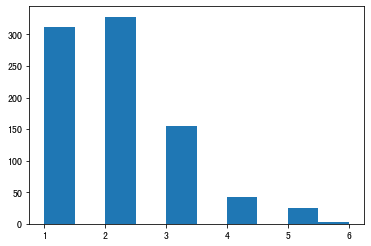

In [198]:
plt.hist(list(cnt.values()))

In [199]:
comm_words = [k for k, v in cnt.items() if v >= 6]


In [205]:
# dic = {k: [i for i in v if i[0] not in comm_words] for k, v in dic.items()}
# {k: len(i) for k, i in dic.items()}

In [206]:
with open('cate_vocab_with_weight.pkl', 'wb') as fout:
    pkl.dump(dic, fout)

In [179]:
# 过滤common词

# comm_words = set(map(lambda x: x[0], dic['good'])).intersection(map(lambda x: x[0], dic['bad']))
# comm_words

In [200]:
dic_ids = {}
i = 0
for k, v in dic.items():
#     dic_ids.setdefault(i, [])

    dic_ids[i] = np.array([item for item in tker.convert_tokens_to_ids([item[0] for item in dic[k]]) if item != 100])
#     dic_ids[i] = np.array([item for item in tker.convert_tokens_to_ids(dic[k]) if item != 100])
    i += 1
dic_ids

{0: array([ 3840,  4297,  5183,  3079,  3001,  4007,  7506,  3795,  3688,
         9403,  6089,  3941,  6957,  6088,  3316,  4031,  3136,  5126,
         5971,  5814,  2897,  2578,  3006,  2490,  7751,  4549,  3361,
         6872,  4075,  6960,  3813,  5211, 10802,  2241,  4274,  5324,
         7027,  4101,  3293,  3514,  7300,  3032,  4132,  3169,  3068,
         4822,  3934,  3902,  5193,  3132,  2833,  4825,  2920,  9542,
         5734,  3863,  2491,  9722,  2631,  2761,  4806,  2865,  2922,
         6636,  5859,  2449,  2580,  3625,  3655,  2592,  4024,  5522,
         3784,  4128,  3919,  3197,  3036,  4969,  3734,  2326,  4800,
         3274,  3325,  2510,  2248,  3665,  2622,  6023,  5115,  2177,
         3498,  3266,  4156,  2853,  4713,  8582,  2968,  2640,  4180,
         3484,  3161,  3776,  3579,  2537,  4316,  3378,  3945,  2974,
         4034,  2536,  4353,  4423,  3954,  5269,  7803,  4096,  4816,
         3078,  3935,  4827,  2678,  2109,  3029,  3309,  2810,  7609,
   

In [201]:
{k: len(i) for k, i in dic_ids.items()}

{0: 128,
 1: 201,
 2: 148,
 3: 49,
 4: 91,
 5: 91,
 6: 85,
 7: 195,
 8: 37,
 9: 48,
 10: 184,
 11: 115,
 12: 93,
 13: 282}

In [203]:
torch.save(dic_ids, 'category_vocab.pt')

In [202]:
torch.save(dic_ids, '/chj/dev/lianxiaolei/LOTClass/datasets/dbpedia/category_vocab.pt.bak_o')
torch.save(dic_ids, '/chj/dev/lianxiaolei/LOTClass/datasets/dbpedia/category_vocab.pt')

In [29]:
dic.keys()

dict_keys(['politics', 'sports', 'business', 'technology'])

In [58]:
govs = set(dic['government'])
govs

{'abuja',
 'act',
 'affair',
 'african',
 'aid',
 'allawi',
 'army',
 'aug',
 'baghdad',
 'britain',
 'british',
 'cabinet',
 'cease',
 'chief',
 'concern',
 'conflict',
 'congo',
 'continent',
 'control',
 'corruption',
 'criticism',
 'darfur',
 'deadline',
 'dec',
 'delegation',
 'democratic',
 'destruction',
 'election',
 'electricity',
 'fight',
 'foreign',
 'headquarters',
 'help',
 'interior',
 'iraqi',
 'islamic',
 'khartoum',
 'kuala',
 'leadership',
 'lebanon',
 'liberation',
 'measure',
 'ministry',
 'month',
 'move',
 'movement',
 'muslim',
 'nairobi',
 'office',
 'oil',
 'organization',
 'permission',
 'population',
 'presence',
 'progress',
 'proposal',
 'province',
 'quot',
 'reform',
 'relief',
 'republic',
 'resistance',
 'resolution',
 'reuters',
 'role',
 'secretary',
 'security',
 'siege',
 'sign',
 'situation',
 'southeast',
 'spokesman',
 'standoff',
 'statement',
 'string',
 'sudanese',
 'support',
 'terrorism',
 'threat',
 'truce',
 'united',
 'violence',
 'warni

In [59]:
with open('datasets/agnews/train.txt', 'r') as fin:
    text = fin.readlines()

In [62]:
from tqdm import tqdm
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

text = [remove_urls(item) for item in tqdm(text)]
text = [re.sub(r'[^\w\s]',' ', item) for item in tqdm(text)]


100%|██████████| 120000/120000 [00:01<00:00, 84762.74it/s]

100%|██████████| 120000/120000 [00:00<00:00, 158611.90it/s]


In [ ]:
for d in tqdm(data):
    d = [i.lower() for i in d.split(' ')]
    if len(govs.intersection(d)) > 0:
        print(govs.intersection(d))

In [68]:
from nltk.corpus import wordnet

wordnet.synsets('nba')

[]

In [79]:
import nltk
pos_tags = nltk.pos_tag('beijing is a building in china'.split())

In [80]:
pos_tags

[('beijing', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('building', 'NN'),
 ('in', 'IN'),
 ('china', 'NN')]

In [81]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()
wnl.lemmatize('located', 'n')

'located'